In [1]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special

In [2]:
def busquedaSecuencial(e, lista):
    for x in lista:
        if e == x:
            return True

    return False

In [3]:
def busquedaBinaria(e, lista):
    n = len(lista)
    if n < 2:
        return busquedaSecuencial(e, lista)
    elif e < lista[n//2]:
        return busquedaBinaria(e, lista[:n//2])
    elif e > lista[n//2]:
        return busquedaBinaria(e, lista[n//2 + 1:])
    else:
        return e == lista[n//2]

In [4]:
def busquedaTernaria(e, lista):
    n = len(lista)
    if n < 3:
        return busquedaSecuencial(e, lista)
    elif e < lista[n//3]:
        return busquedaTernaria(e, lista[:n//3])
    elif e > lista[n//3]:
        if e < lista[2*n//3]:
            return busquedaTernaria(e, lista[n//3 + 1:2*n//3])
        elif e > lista[2*n//3]:
            return busquedaTernaria(e, lista[2*n//3 + 1:])
        else:
            return e == lista[2*n//3]
    else:
        return e == lista[n//3]

In [9]:
n_min = 10
n_max = 1000
st = 2
iteraciones = 10

t_binaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        v.sort()
        suma += timeit.timeit(lambda: busquedaBinaria(1000000, v), number = 1)
    promedio = suma / iteraciones
    t_binaria.append(promedio)

t_ternaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        v.sort()
        suma += timeit.timeit(lambda: busquedaTernaria(1000000, v), number = 1)
    promedio = suma / iteraciones
    t_ternaria.append(promedio)

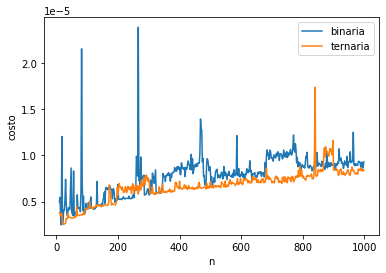

In [10]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_binaria, label = 'binaria')
plt.xlabel('n')
plt.ylabel('costo')


plt.plot(eje_x, t_ternaria, label = 'ternaria')
plt.legend()